## Линейная модель

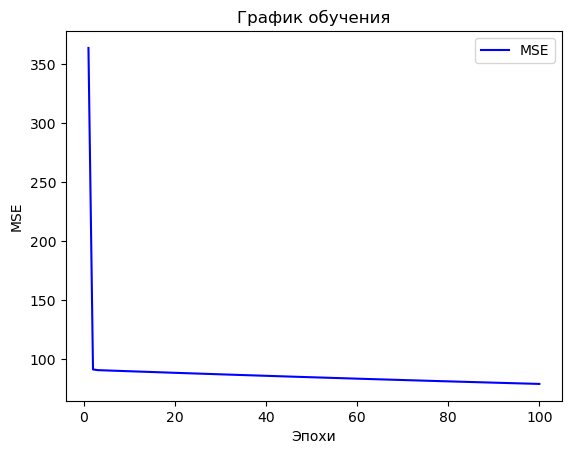

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.random.rand(num_features)
        self.bias = 0

    def __call__(self, X):
        return self(X)


class LinearRegressor(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        error_history = []
        N = X.shape[0]
        for _ in range(epochs):
            weighted_X = X*self.weights + self.bias
            predictions = np.sum(weighted_X, axis=1)
            error = y - predictions
            gradient = np.asarray((-2/N)*np.sum(error*np.transpose(X), axis=1), dtype=np.float32)
            self.weights -= learning_rate * gradient
            self.bias -= learning_rate * np.mean(error)
            current_error = ((y - predictions) ** 2).sum() / N
            error_history.append(current_error)
        return error_history

    def predict(self, X):
        return X*self.weights + self.bias



data = pd.read_csv('https://raw.githubusercontent.com/LePaVuki/lab3/main/Student_Performance.csv')
data.head()

Y = data['Performance Index']
X = data.iloc[:, :5]
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': True, 'No': False})
X = X.to_numpy()

# Вычислите среднее по столбцам.
mean = np.mean(X, axis=0)

# Вычислите стандартное отклонение по столбцам.
std = np.zeros_like(list(range(X.shape[1])), dtype=np.float32)
for i in range(len(std)):
    std[i] = np.std(X[:, i])

# std = np.std(X, axis=0) DOESNT WORK !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Нормализуйте данные по столбцам (стандартное масштабирование).
normalized_X = (X - mean) / std
# Нормализуйте и выходные данные
normalized_Y = (Y.to_numpy() - np.mean(Y.to_numpy())) / np.std(Y.to_numpy())

lr = LinearRegressor(num_features=X.shape[1])
history = lr.fit(X, Y.to_numpy(), learning_rate=0.0001, epochs=100)

epochs = range(1, len(history) + 1)

# Постройте график обучения.
plt.plot(epochs, history, 'b', label='MSE')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()

# Отобразите график.
plt.show()